In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

# Problem statement

# Reading the dataset and Data Exploration

In [2]:
data = pd.read_csv('financial_transactions.csv')
data.head()

,transaction_id,date,customer_id,amount,type,description
0,1,2020-10-26,926,6478.39,credit,Expect series shake art again our.
1,2,2020-01-08,466,1255.95,credit,Each left similar likely coach take.
2,3,2019-09-02,110,7969.68,debit,Direction wife job pull determine leader move ...
3,4,2020-12-02,142,2927.41,credit,Agree reveal buy black already.
4,5,2020-12-02,944,4661.88,debit,Child relationship show college whom speech.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  100000 non-null  int64  
 1   date            100000 non-null  object 
 2   customer_id     100000 non-null  int64  
 3   amount          100000 non-null  float64
 4   type            100000 non-null  object 
 5   description     100000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [4]:
data.nunique().to_frame('number of unique values')

,number of unique values
transaction_id,100000
date,1827
customer_id,1000
amount,95195
type,3
description,100000


In [5]:
data.describe()

,transaction_id,customer_id,amount
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,499.594710,5009.012768
std,28867.657797,288.973503,2888.443654
min,1.000000,1.000000,1.290000
25%,25000.750000,249.000000,2514.572500
50%,50000.500000,499.000000,5006.135000
75%,75000.250000,750.000000,7513.840000
max,100000.000000,1000.000000,10000.000000


In [6]:
data.duplicated().any()

False

In [7]:
# Removing column
data = data.drop(['description'], axis = 1)
data.head()

,transaction_id,date,customer_id,amount,type
0,1,2020-10-26,926,6478.39,credit
1,2,2020-01-08,466,1255.95,credit
2,3,2019-09-02,110,7969.68,debit
3,4,2020-12-02,142,2927.41,credit
4,5,2020-12-02,944,4661.88,debit


In [8]:
# Check the null values
null_total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count()) * 100).sort_values(ascending=False)
print("Total records = ", data.shape[0])

Total records =  100000


In [9]:
# Missing data
missing_data = pd.concat([null_total, percent.round(1)], axis=1, keys=['Total Missing', 'In Precent'])
missing_data

,Total Missing,In Precent
transaction_id,0,0.0
date,0,0.0
customer_id,0,0.0
amount,0,0.0
type,0,0.0


In [10]:
# Duplicated data
duplicated_data = data.loc[data.duplicated()].count().to_frame('Total Duplicate')
duplicated_data 

,Total Duplicate
transaction_id,0
date,0
customer_id,0
amount,0
type,0


In [11]:
# Converting dtype od 'date' column to datetime64[ns]
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  100000 non-null  int64         
 1   date            100000 non-null  datetime64[ns]
 2   customer_id     100000 non-null  int64         
 3   amount          100000 non-null  float64       
 4   type            100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [12]:
# Creating new columns out of 'date'
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')
data['year'] = data['date'].dt.year
data['day_of_week'] = data['date'].dt.strftime('%a')
data

,transaction_id,date,customer_id,amount,type,day,month,year,day_of_week
0,1,2020-10-26,926,6478.39,credit,26,Oct,2020,Mon
1,2,2020-01-08,466,1255.95,credit,8,Jan,2020,Wed
2,3,2019-09-02,110,7969.68,debit,2,Sep,2019,Mon
3,4,2020-12-02,142,2927.41,credit,2,Dec,2020,Wed
4,5,2020-12-02,944,4661.88,debit,2,Dec,2020,Wed
...,...,...,...,...,...,...,...,...,...
99995,99996,2020-09-07,40,8572.18,debit,7,Sep,2020,Mon
99996,99997,2021-09-24,951,1861.95,credit,24,Sep,2021,Fri
99997,99998,2020-09-10,533,8265.77,transfer,10,Sep,2020,Thu
99998,99999,2022-08-22,65,6874.50,debit,22,Aug,2022,Mon


# Enriching the data


In [13]:
from faker import Faker

In [14]:
# Create an instance of the Faker class
fake = Faker()

In [29]:
# Add new column 'names' 
data['names'] = [fake.name() for _ in range(100000)]
#data.head()

In [30]:
# Add new column 'store'
data['store'] = [fake.company() for _ in range(100000)]
#data.head()

In [31]:
# Add new column 'job'
data['job'] = [fake.job() for _ in range(100000)]
data.head()

,transaction_id,date,customer_id,amount,type,day,month,year,day_of_week,names,store,job
0,1,2020-10-26,926,6478.39,credit,26,Oct,2020,Mon,Mario Porter,Pace-Riggs,Herpetologist
1,2,2020-01-08,466,1255.95,credit,8,Jan,2020,Wed,Shannon Stone,"Lopez, Hughes and Brown",Civil Service fast streamer
2,3,2019-09-02,110,7969.68,debit,2,Sep,2019,Mon,Jessica Hampton,"Burke, Mckenzie and Hernandez","Engineer, water"
3,4,2020-12-02,142,2927.41,credit,2,Dec,2020,Wed,Monica Hess,Rivera Ltd,Building services engineer
4,5,2020-12-02,944,4661.88,debit,2,Dec,2020,Wed,Kyle Morgan,Franco LLC,Museum/gallery exhibitions officer


# Number of transactions and Visualization

In [32]:
# Transactions by Year
trans_by_year = data.groupby('year').size().reset_index()
trans_by_year.columns = ['year', 'count']
trans_by_year

,year,count
0,2018,15455
1,2019,20018
2,2020,20104
3,2021,19759
4,2022,19813
5,2023,4851


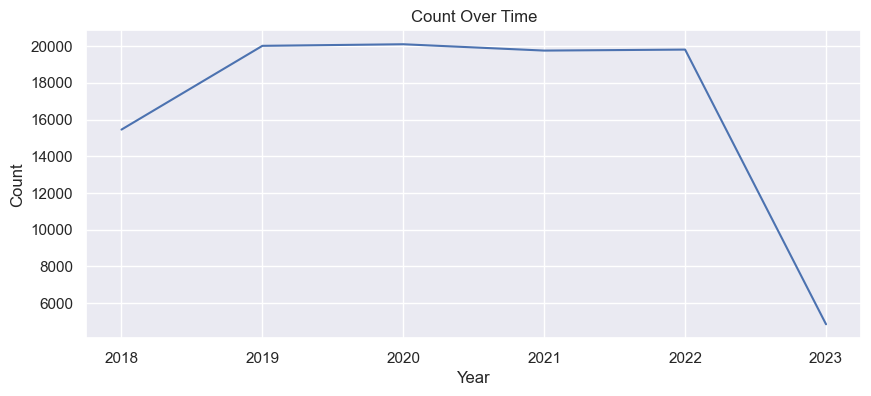

In [33]:
# Count Over Time of transactions - Line chart
plt.figure(figsize=(10, 4))
sns.set(style="darkgrid")
sns.lineplot(x='year', y='count', data=trans_by_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Over Time')

# Display the plot
plt.show()

In [20]:
# Creating a pivot table with 'year' as index, 'month' as columns, and 'amount' as values
pivot_df = data.pivot_table(index='year', columns='month', values='amount', aggfunc='sum')
pivot_df

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2018,8165918.47,8658032.26,8355343.64,NaN,NaN,8717899.94,8229321.90,1411092.04,8757920.69,8226845.34,8296004.70,8395163.23
2019,8429625.58,8436444.59,8555212.53,7512402.26,8743444.98,8386115.82,8286930.64,8716455.12,8487019.80,8172575.71,8499618.22,8047804.60
2020,8123586.32,8097193.62,8798675.38,8128672.00,8241570.04,8677787.14,8234636.64,8844599.61,8778939.14,8050284.55,8622610.53,8337794.51
2021,7957847.96,7890702.05,8375101.88,7928900.06,8727143.23,8319212.04,8378079.08,8114197.92,8517712.70,8613379.33,8469044.84,7953756.43
2022,8213208.28,8438032.88,8073011.48,7316961.59,8358268.30,8073155.50,8417282.47,8263649.86,8595324.37,8238459.21,8779140.52,8318492.74
2023,NaN,NaN,NaN,7898366.70,8439522.36,NaN,NaN,7809781.51,NaN,NaN,NaN,NaN


In [21]:
# Define a list of month names in the desired order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Sort the columns in the pivot_df DataFrame based on the month order
pivot_df_sorted = pivot_df.reindex(columns=month_order)
pivot_df_sorted

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2018,NaN,NaN,1411092.04,8165918.47,8757920.69,8229321.90,8717899.94,8658032.26,8395163.23,8296004.70,8226845.34,8355343.64
2019,8743444.98,7512402.26,8716455.12,8429625.58,8487019.80,8286930.64,8386115.82,8436444.59,8047804.60,8499618.22,8172575.71,8555212.53
2020,8241570.04,8128672.00,8844599.61,8123586.32,8778939.14,8234636.64,8677787.14,8097193.62,8337794.51,8622610.53,8050284.55,8798675.38
2021,8727143.23,7928900.06,8114197.92,7957847.96,8517712.70,8378079.08,8319212.04,7890702.05,7953756.43,8469044.84,8613379.33,8375101.88
2022,8358268.30,7316961.59,8263649.86,8213208.28,8595324.37,8417282.47,8073155.50,8438032.88,8318492.74,8779140.52,8238459.21,8073011.48
2023,8439522.36,7898366.70,7809781.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Existing data had missing values and needed to be filled with the mean value

In [22]:
# Calculate the mean value of each column
mean_values = pivot_df.mean()
mean_values

month
Apr    8178037.322
Aug    8304081.080
Dec    8431468.982
Feb    7757060.522
Jan    8501989.782
Jul    8434834.088
Jun    8309250.146
Mar    7193296.010
May    8627383.340
Nov    8260308.828
Oct    8533283.762
Sep    8210602.302
dtype: float64

In [23]:
# Fill missing values
pivot_df_filled = pivot_df_sorted.fillna(mean_values)
pivot_df_filled

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2018,8501989.782,7757060.522,1411092.04,8165918.470,8757920.69,8229321.900,8717899.940,8658032.26,8395163.230,8296004.700,8226845.340,8355343.640
2019,8743444.980,7512402.260,8716455.12,8429625.580,8487019.80,8286930.640,8386115.820,8436444.59,8047804.600,8499618.220,8172575.710,8555212.530
2020,8241570.040,8128672.000,8844599.61,8123586.320,8778939.14,8234636.640,8677787.140,8097193.62,8337794.510,8622610.530,8050284.550,8798675.380
2021,8727143.230,7928900.060,8114197.92,7957847.960,8517712.70,8378079.080,8319212.040,7890702.05,7953756.430,8469044.840,8613379.330,8375101.880
2022,8358268.300,7316961.590,8263649.86,8213208.280,8595324.37,8417282.470,8073155.500,8438032.88,8318492.740,8779140.520,8238459.210,8073011.480
2023,8439522.360,7898366.700,7809781.51,8178037.322,8627383.34,8309250.146,8434834.088,8304081.08,8210602.302,8533283.762,8260308.828,8431468.982


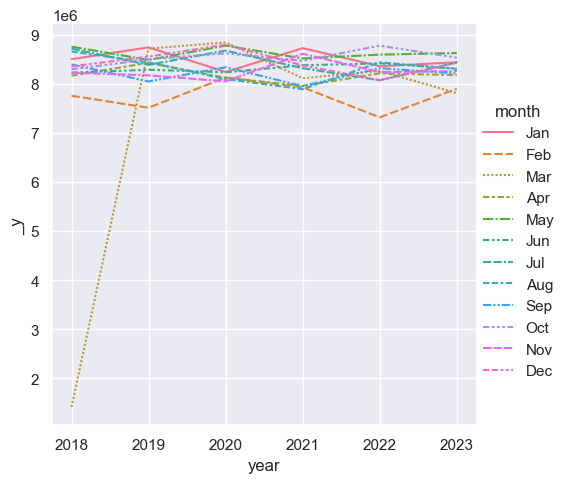

In [24]:
sns.relplot(data=pivot_df_filled, kind="line")

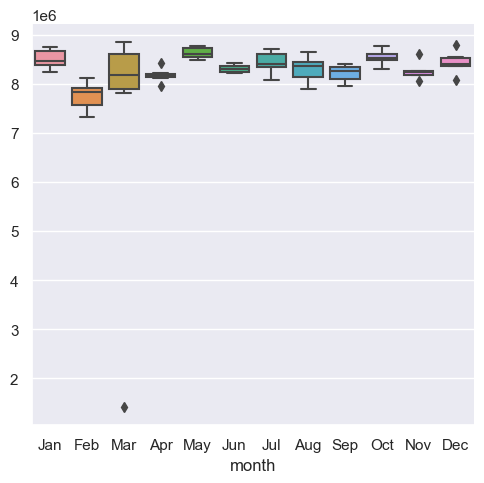

In [25]:
sns.catplot(data=pivot_df_filled, kind="box")

In [26]:
data.head()

,transaction_id,date,customer_id,amount,type,day,month,year,day_of_week,names,store,job
0,1,2020-10-26,926,6478.39,credit,26,Oct,2020,Mon,Deanna Stewart,"Gutierrez, Bullock and Rodgers","Engineer, control and instrumentation"
1,2,2020-01-08,466,1255.95,credit,8,Jan,2020,Wed,Christopher Davis,Hurst and Sons,Clothing/textile technologist
2,3,2019-09-02,110,7969.68,debit,2,Sep,2019,Mon,Deborah Fox,Ramirez-Clark,"Lighting technician, broadcasting/film/video"
3,4,2020-12-02,142,2927.41,credit,2,Dec,2020,Wed,Susan Jones,"Gonzalez, Bennett and Chapman",Physiotherapist
4,5,2020-12-02,944,4661.88,debit,2,Dec,2020,Wed,Alison Young,Stout-Peterson,"Engineer, civil (consulting)"


# The most transactions by the potential customer

In [83]:
# Group by 'customer' and calculate the sum of 'amount' and get the corresponding 'type'
customer_totals = data.groupby('names').agg({'amount': 'sum', 'type': 'first'})

# Sort by 'amount' in descending order and get the top 10 customers
top_10_customers = customer_totals.sort_values(by='amount', ascending=False).head(10)

# Merge with the original DataFrame to get the complete information for the top 10 customers
merged_df = pd.merge(top_10_customers, data, on=['names', 'type'])

# Select and display the desired columns
top_10_customers_df = merged_df[['names', 'amount_x', 'year', 'type']]
top_10_customers_df.columns = ['names', 'amount', 'year', 'type']
top_10_customers_df

,names,amount,year,type
0,Michael Smith,286591.12,2018,transfer
1,Michael Smith,286591.12,2022,transfer
2,Michael Smith,286591.12,2022,transfer
3,Michael Smith,286591.12,2020,transfer
4,Michael Smith,286591.12,2018,transfer
...,...,...,...,...
114,Michael Williams,150993.59,2020,debit
115,Michael Williams,150993.59,2018,debit
116,Michael Williams,150993.59,2020,debit
117,Michael Williams,150993.59,2018,debit


In [84]:
top_10_customers

,amount,type
names,,
Michael Smith,286591.12,transfer
Christopher Smith,202772.67,debit
James Smith,182808.76,credit
Michael Johnson,180088.87,debit
Michael Brown,169029.97,transfer
John Johnson,160772.61,debit
Lisa Smith,158502.28,debit
Christopher Johnson,156828.21,credit
James Johnson,151562.32,credit


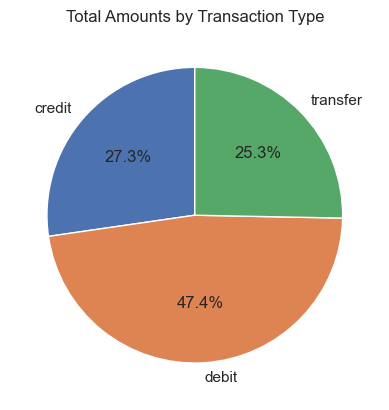

In [85]:
# Group by 'type' and calculate the sum of 'amount' for each transaction type
transaction_totals = top_10_customers.groupby('type')['amount'].sum()

# Extracting the required data
transaction_types = transaction_totals.index
transaction_amounts = transaction_totals.values

# Plotting the pie chart
plt.pie(transaction_amounts, labels=transaction_types, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Total Amounts by Transaction Type')

# Display the chart
plt.show()